#CNN Testing in Computational Vision

I using the fashion_mnist dataset (it's is bundled with Keras distribution). The dataset contains 60k images of fashion items. 


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The dataset has 60k training images and 10k to test. All images are 28X28 size.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


I have a look at a random item.

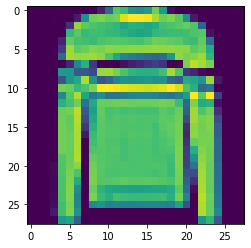

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[5])

I create a subplot to see more items.

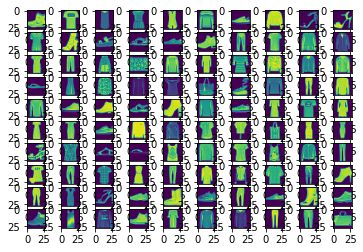

In [ ]:
for imagem in range (100):
  plt.subplot(10,10, imagem+1)
  plt.imshow(X_train[imagem])


## Preprocessing images and labels

The pixel values are integer values between 0 and 255 and the mean and standard deviation of the pixel values are similar between the X_train and X_test.

In [3]:
# convert in 32 bit float to normalize the images
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [4]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape) 
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Label variables

In [5]:
print(y_train.shape) 
print(y_test.shape)

(60000,)
(10000,)


Keras provides a method to encode the label data of which class.

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Deep Learning Model

In [15]:
model = Sequential()

model.add(Convolution2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

##Compile and train

In [10]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 40s 92ms/step - loss: 0.6899 - accuracy: 0.7524 - val_loss: 0.4431 - val_accuracy: 0.8417
Epoch 2/10
422/422 [==============================] - 39s 92ms/step - loss: 0.4472 - accuracy: 0.8408 - val_loss: 0.3808 - val_accuracy: 0.8653
Epoch 3/10
422/422 [==============================] - 39s 92ms/step - loss: 0.4014 - accuracy: 0.8553 - val_loss: 0.3488 - val_accuracy: 0.8745
Epoch 4/10
422/422 [==============================] - 39s 91ms/step - loss: 0.3710 - accuracy: 0.8669 - val_loss: 0.3358 - val_accuracy: 0.8788
Epoch 5/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3516 - accuracy: 0.8764 - val_loss: 0.3261 - val_accuracy: 0.8803
Epoch 6/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3321 - accuracy: 0.8808 - val_loss: 0.2949 - val_accuracy: 0.8927
Epoch 7/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3234 - accuracy: 0.8840 - val_loss: 0.2919 - val_accuracy:

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("accuracy", score[1])
print("loss", score[0]) 

accuracy 0.8978000283241272
loss 0.2873523533344269


In [13]:
predictions = model.predict(X_test[:20])
print("predictions:", np.argmax(predictions, axis=1))
print("labels     :", np.argmax(y_test[:20], axis=1))

predictions: [9 2 1 1 6 1 4 6 5 7 4 5 8 3 4 1 2 4 8 0]
labels     : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
